# Implementação do Algoritmo Backpropagation

A ideia do algoritmo backpropagation é, com base no cálculo do erro ocorrido na camada de saída da rede neural, recalcular o valor dos pesos do vetor w da camada última camada de neurônios e assim proceder para as camadas anteriores, de trás para a frente (fase *backward*), ou seja, atualizar todos os pesos w das camadas a partir da última até atingir a camada de entrada da rede, para isso realizando a retropropagação o erro obtido pela rede. 

A imagem a seguir mostra a nossa rede, com as unidades de entrada marcadas como Input1, Input2 e Input3 (**Input Layer**) conectadas com os *nós* da camada oculta (**Hidden Layer**). Por sua vez as saída dos *nós* da camada oculda servem como entrada para os *nós*  da camada de saída (**Output Layer**). <img src='MPL_back.png' /><br>

O DataSet utilizado para o treinamento da MPL 3x4x2 é o **"Data.csv"**, o qual possui informações dispostas em colunas:

* **Input1**:  Entrada 1 da MPL.
* **Input2**:  Entrada 2 da MPL.
* **Input3**:  Entrada 3 da MPL.
* **Output1**:  Saída 1 da MPL.
* **Output2**:  Saída 2 da MPL.


### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Para que uma rede dessas funcione, é preciso treiná-la. O treinamento de uma rede MLP insere-se no contexto de aprendizado de máquina supervisionado, em que cada amostra de dados utilizada apresenta um rótulo informando a que classificação ela se encaixa. Assim, utilizaremos um arquivo Data.csv como dataset para treinamento da nossa MPL.

Vamos começar lendo o arquivo Data.csv em um dataframe do pandas.

In [2]:
DataSet=pd.read_csv('Data.csv')

In [3]:
DataSet.head()

,Input1,Input2,Input3,Output1,Output2
0,0.93,0.23,0.73,0.41,0.42
1,0.49,0.85,0.50,0.41,0.81
2,0.86,0.04,0.68,0.35,0.22
3,0.71,0.29,0.30,0.24,0.67
4,0.96,0.78,0.82,0.56,0.89


In [4]:
DataSet.head()

,Input1,Input2,Input3,Output1,Output2
0,0.93,0.23,0.73,0.41,0.42
1,0.49,0.85,0.50,0.41,0.81
2,0.86,0.04,0.68,0.35,0.22
3,0.71,0.29,0.30,0.24,0.67
4,0.96,0.78,0.82,0.56,0.89


### Váriaveis do *Dataset*

In [5]:
DataSet.columns

Index(['Input1', 'Input2', 'Input3', 'Output1', 'Output2'], dtype='object')

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(DataSet.drop(['Output1', 'Output2'],axis=1), 
                                                   DataSet[['Output1', 'Output2']], test_size=0.30, 
                                                    random_state=101)

## Configuração da MPL

In [12]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 4
N_output = 2
learnrate = 0.5

## Inicialização dos pesos da MPL (Aleatório)

In [13]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.02049502  0.14300398 -0.15584371 -0.03613289]
 [ 0.01211396 -0.12427154  0.0733909  -0.0582209 ]
 [ 0.07031934  0.15441709 -0.02710754 -0.09171591]]
Pesos da Camada de Saída:
[[-0.23840306  0.09055203]
 [ 0.20344908 -0.0812218 ]
 [-0.02180511  0.1798315 ]
 [ 0.01464826  0.19914728]]


## Algoritmo Backpropagation



In [14]:
epochs = 5000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.17694741907159717
Erro quadrático no treinamento:  0.28271854725366086  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.2513682194303479
Erro quadrático no treinamento:  0.1508642174833938
Erro quadrático no treinamento:  0.07177637631757337
Erro quadrático no treinamento:  0.047043833246219025
Erro quadrático no treinamento:  0.03705992358677393
Erro quadrático no treinamento:  0.03195775751699078
Erro quadrático no treinamento:  0.028902419032672204
Erro quadrático no treinamento:  0.02685999345463503
Erro quadrático no treinamento:  0.025385106528447946
Erro quadrático no treinamento:  0.02426120157429027
Erro quadrático no treinamento:  0.023371636867999934
Erro quadrático no treinamento:  0.022647744052905497
Erro quadrático no treinamento:  0.02204603775594915
Erro quadrático no treinamento:  0.021537367303987018
Erro quadrático no treinamento:  0.021101311102294046
Erro quadrático no treinamento:  0.020723054083602095
Erro qu

### Gráfico da Evolução do Erro

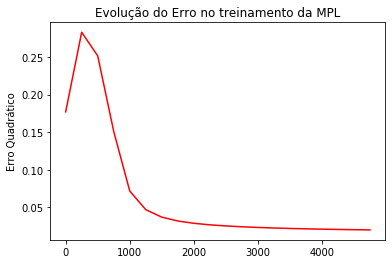

In [15]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()


## Validação do modelo

In [11]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
MSE_Output1=0
MSE_Output2=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        
#-------------------------------------------    
    
#Cálculo do Erro
        ## TODO: Cálculo do Erro
        error = yi - output
        MSE_Output1 += (yi[0] - output[0])**2
        MSE_Output2 += (yi[1] - output[1])**2
          
#Erro Quadrático Médio 
MSE_Output1/=n_records 
MSE_Output2/=n_records  

print('Erro Quadrático Médio da Saída Output1 é: ',MSE_Output1)
print('Erro Quadrático Médio da Saída Output2 é: ',MSE_Output2)

Erro Quadrático Médio da Saída Output1 é:  0.016272679572864164
Erro Quadrático Médio da Saída Output2 é:  0.024424096787120552


## Métricas de Avaliação

Aqui estão três métricas comuns de avaliação para problemas de regressão:


- **Erro Médio Absoluto** (MAE): é a média do valor absoluto dos erros.

- **Erro Quadrático Médio** (MSE): é a média do quadrado dos erros.

- **Raiz do Erro Médio Quadrático** (RMSE): é a raiz da média do quadrado dos erro.


O objetivo é sempre minimizar estas funções de Erro.